In [106]:
from qiskit import * 
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector, plot_state_qsphere, plot_state_paulivec, plot_state_hinton
%matplotlib inline

Circuit depth: 5


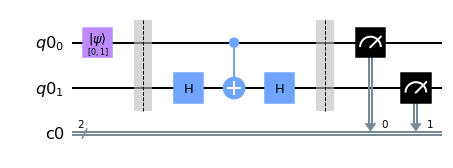

In [126]:
cr = ClassicalRegister(2, "c0")
qr = QuantumRegister(2, "q0")

circuit = qiskit.QuantumCircuit(qr, cr)

circuit.initialize([0,1], 0)

circuit.barrier()
circuit.h(1)
circuit.cx(0,1)
circuit.h(1)
circuit.barrier()

#result2 = transpile(circuit, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=3)
#result2.to_gate().control()

circuit.measure([0,1],[0,1])
#circuit.measure_all()
print("Circuit depth: " + str(circuit.depth()))
circuit.draw(output="mpl")

In [18]:
print(circuit.num_qubits)

2


In [19]:
# simulators
qasm_sim = qiskit.Aer.get_backend("aer_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

In [20]:
sim_state_vector = qiskit.execute(circuit, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(circuit, backend=qasm_sim, shots=1024).result().get_counts()

In [21]:
sim_state_vector

array([ 0.+0.000000e+00j,  1.-6.123234e-17j,  0.+0.000000e+00j,
       -0.+0.000000e+00j])

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


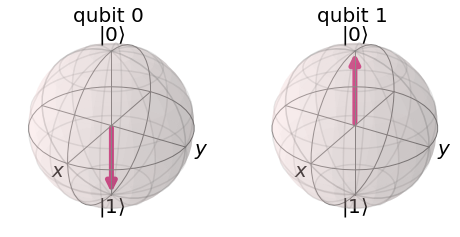

In [22]:
plot_bloch_multivector(sim_state_vector)

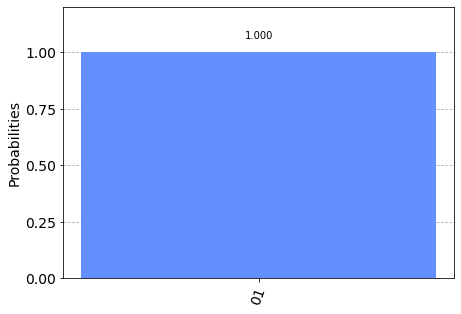

In [23]:
result = execute(circuit, backend=qasm_sim).result()

counts_sim = result.get_counts()

plot_histogram(counts_sim)

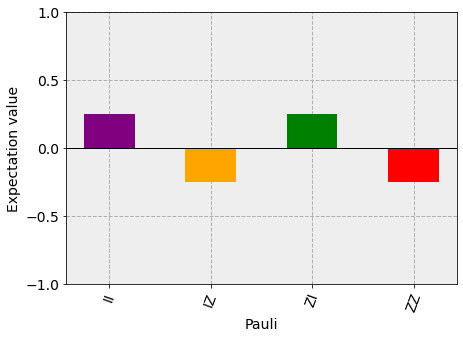

In [24]:
plot_state_paulivec(sim_state_vector, color=['purple', 'orange', 'green', 'red'])

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


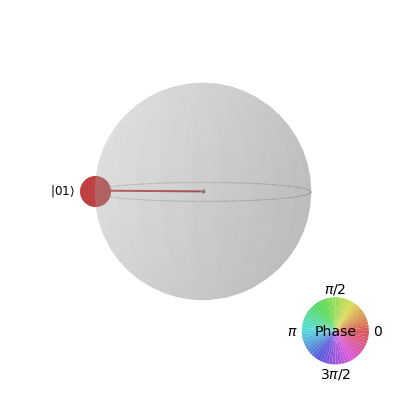

In [25]:
plot_state_qsphere(sim_state_vector)

In [93]:
circuit.qasm(formatted=True, filename="controlled_z.qasm")

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
initialize(0,1) q0[0];
barrier q0[0],q0[1];
h q0[1];
cx q0[0],q0[1];
h q0[1];
barrier q0[0],q0[1];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];



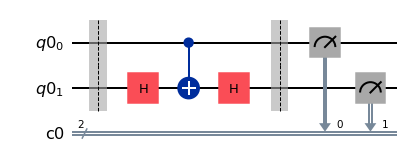

In [96]:
# from file
# initialize(0,1) q0[0]; --> NOT SUPPORTED IN QASM
qc = QuantumCircuit.from_qasm_file("controlled_z.qasm")

qc.draw(output='mpl', style='iqx')

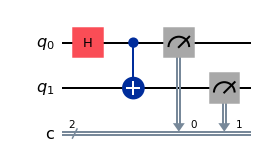

In [27]:
# from file
qc = QuantumCircuit.from_qasm_file("entanglement.qasm")

qc.draw(output='mpl', style='iqx')

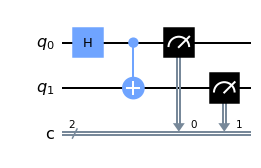

In [28]:
qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q -> c;
"""

# From str.
qc = QuantumCircuit.from_qasm_str(qasm_str)

qc.draw(output='mpl')

In [29]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_gate_map, plot_error_map, plot_circuit_layout
from qiskit.tools.monitor import job_monitor

In [66]:
if not IBMQ.active_account():
    IBMQ.load_account()

IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [62]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [63]:
print(provider)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>


In [64]:
provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [68]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits > 1 and b.status().operational and not b.configuration().simulator))

In [21]:
backend = least_busy(provider.backends(filters=lambda b: b.status().operational and not b.configuration().simulator))

In [22]:
# get last executed job
backend.jobs()[0].job_id()

'60c706d3d15dfdde1f7fefb0'

In [23]:
backend.jobs()[0].creation_date()

datetime.datetime(2021, 6, 14, 8, 35, 47, 859000, tzinfo=tzlocal())

In [24]:
backend = least_busy(provider.backends(filters=lambda b: not b.configuration().simulator))

In [71]:
display(backend)

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
display(backend.configuration().__dict__)

{'n_uchannels': 0,
 'u_channel_lo': [],
 'meas_levels': [1, 2],
 'qubit_lo_range': [[4471664869.927839, 5471664869.927839]],
 'meas_lo_range': [[6493370669.0, 7493370669.0]],
 'meas_kernels': ['hw_boxcar'],
 'discriminators': ['quadratic_discriminator', 'linear_discriminator'],
 'hamiltonian': {'description': 'Qubits are modeled as Duffing oscillators. In this case, the system includes higher energy states, i.e. not just |0> and |1>. The Pauli operators are generalized via the following set of transformations:\n\n$(\\mathbb{I}-\\sigma_{i}^z)/2 \\rightarrow O_i \\equiv b^\\dagger_{i} b_{i}$,\n\n$\\sigma_{+} \\rightarrow b^\\dagger$,\n\n$\\sigma_{-} \\rightarrow b$,\n\n$\\sigma_{i}^X \\rightarrow b^\\dagger_{i} + b_{i}$.\n\nQubits are coupled through resonator buses. The provided Hamiltonian has been projected into the zero excitation subspace of the resonator buses leading to an effective qubit-qubit flip-flop interaction. The qubit resonance frequencies in the Hamiltonian are the cavit

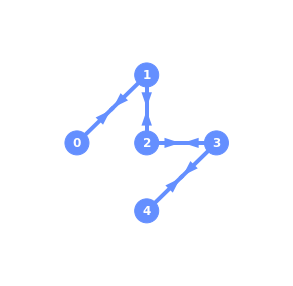

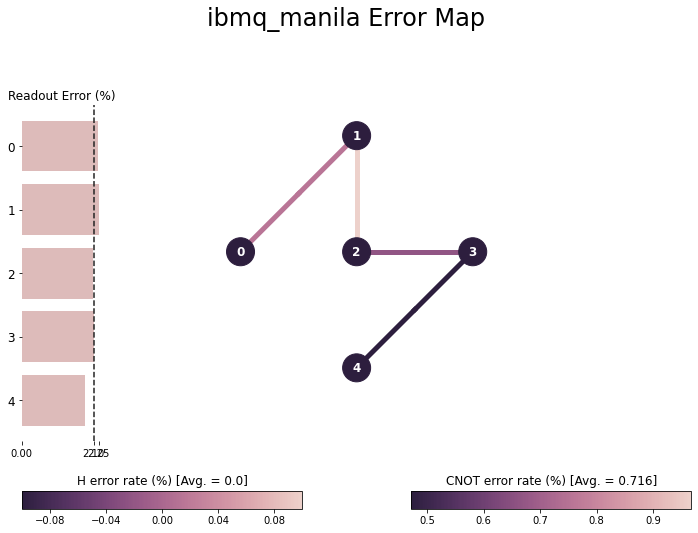

In [211]:
display(plot_gate_map(backend, plot_directed=True))
display(plot_error_map(backend))

In [28]:
all_backends_available = provider.backends(filters=lambda b: b.configuration().n_qubits > 1 and b.status().operational and not b.configuration().simulator)

In [29]:
counts = {}

for backend in all_backends_available[0:2]:
    
    job = execute(circuit, backend, shots=1000)
    
    print("Backend: " + backend.name() + " - Job ID: " + job.job_id())
    
    job_monitor(job)
    
    print("\n")
    
    result = job.result()
    counts[backend.name()] = result.get_counts(circuit)

Backend: ibmqx2 - Job ID: 60c7707c434fc61560b3190b
Job Status: job has successfully run


Backend: ibmq_16_melbourne - Job ID: 60c770c958fe6b4ee34134c7
Job Status: job has successfully run


Backend: ibmq_athens - Job ID: 60c77446122c8e300f6f1470
Job Status: job has successfully run




In [30]:
counts["local_simulator"] = counts_sim


Raw results: {'ibmqx2': {'00': 130, '01': 828, '10': 16, '11': 26}, 'ibmq_16_melbourne': {'00': 74, '01': 838, '10': 8, '11': 80}, 'ibmq_athens': {'00': 17, '01': 969, '11': 14}, 'local_simulator': {'01': 1024}}


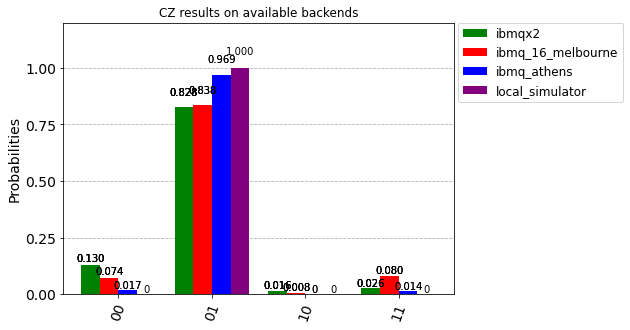

In [31]:
print("\nRaw results:", counts)

colors = ['green', 'red', 'blue', 'purple', 'brown', 'yellow']

display(plot_histogram(list(counts.values()), 
                       title = "CZ results on available backends", 
                       legend=list(counts), 
                       color = colors[0:len(colors)], bar_labels=True))

In [32]:
provider.backends(filters=lambda b: not b.configuration().simulator)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [31]:
import qiskit.quantum_info as qi

matrix_density = qi.DensityMatrix(sim_state_vector)
matrix_density.draw('latex', prefix='\\ Matrix\ Density = ')

<IPython.core.display.Latex object>

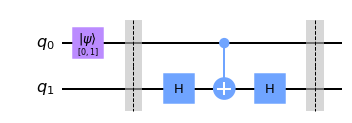

In [34]:
circuit = qiskit.QuantumCircuit(2)

circuit.initialize([0,1], 0)

circuit.barrier()
circuit.h(1)
circuit.cx(0,1)
circuit.h(1)
circuit.barrier()

circuit.draw('mpl')


Backend: ibmqx2 / Num. qubits: 5


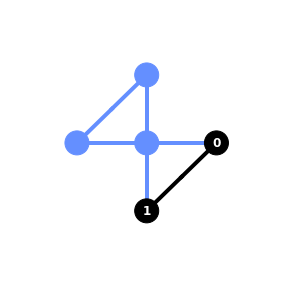


Backend: ibmq_16_melbourne / Num. qubits: 15


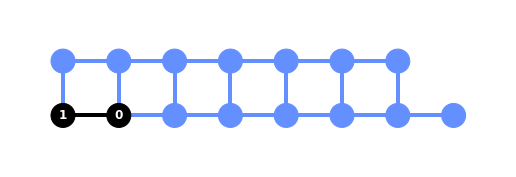


Backend: ibmq_athens / Num. qubits: 5


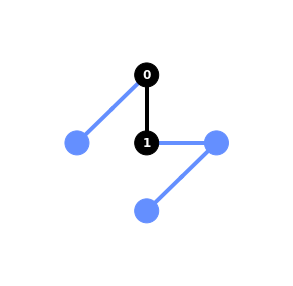


Backend: ibmq_santiago / Num. qubits: 5


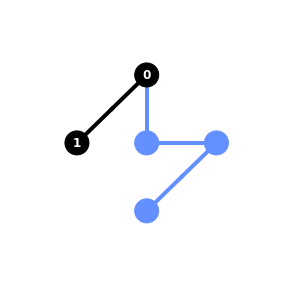


Backend: ibmq_lima / Num. qubits: 5


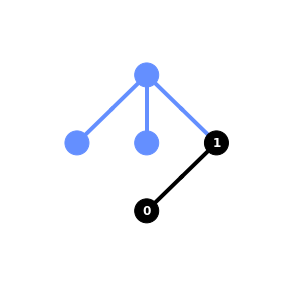


Backend: ibmq_belem / Num. qubits: 5


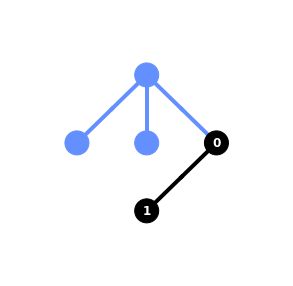


Backend: ibmq_quito / Num. qubits: 5


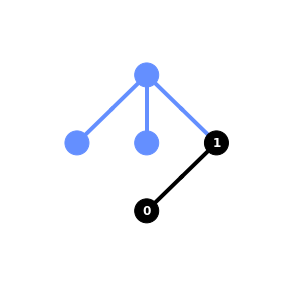


Backend: ibmq_manila / Num. qubits: 5


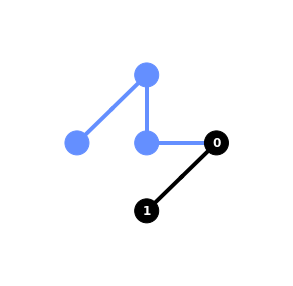

In [35]:
for i in range(len(all_backends_available)):

    curent_backend = all_backends_available[i]
    transpiled_circuit = transpile(circuit, backend=curent_backend, optimization_level=3)
    
    print("\nBackend: " + curent_backend.name() + " / Num. qubits: " + str(curent_backend.configuration().n_qubits))
    display(plot_circuit_layout(transpiled_circuit, curent_backend))

In [36]:
usim = Aer.get_backend('unitary_simulator')

transpiled = transpile(circuit, backend=usim, optimization_level=3)

qobj = assemble(transpiled)

unitary = usim.run(qobj).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit operation = }\n")

<IPython.core.display.Latex object>

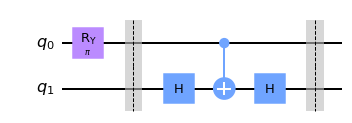

In [37]:
transpiled.draw('mpl')

In [38]:
from qiskit.quantum_info import Operator

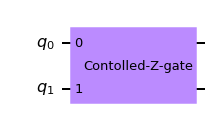

In [39]:
# create circuit from unitary matrix
operator_matrix = Operator(unitary)

qc = QuantumCircuit(2)

qc.unitary(operator_matrix, [0,1], label='Contolled-Z-gate')

qc.draw(output='mpl')

In [40]:
# random unitary matrix
from qiskit.quantum_info import Operator, random_unitary
U = random_unitary(4, seed=None)

from qiskit.visualization import array_to_latex
array_to_latex(U, prefix="\\text{random unitary matrix = }\n")

<IPython.core.display.Latex object>

In [41]:
retrieved_job = all_backends_available[0].retrieve_job("60bd2a7c61f15fc4f4ba0cbe")

In [42]:
retrieved_job.job_id()

'60bd2a7c61f15fc4f4ba0cbe'

In [43]:
job_monitor(retrieved_job)

Job Status: job has successfully run


In [44]:
retrieved_job.status()

<JobStatus.DONE: 'job has successfully run'>

In [45]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

In [46]:
import numpy as np
  
A = np.array([[0,1,0],
              [0,0,1],
              [1,0,0]])
  
print(np.linalg.inv(A))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [47]:
A = np.array([[1,3,8],
              [3,1,4],
              [8,4,1]])

print(A.T)

[[1 3 8]
 [3 1 4]
 [8 4 1]]


In [48]:
A = np.array([[1,4,3],
              [1,-1,1],
              [3.5,1,-2.5]])

B = np.array([[2,2,1.75],
              [8,-2,0.5],
              [6,2,-1.25]])

np.matmul(A,B)

array([[52.  ,  0.  ,  0.  ],
       [ 0.  ,  6.  ,  0.  ],
       [ 0.  ,  0.  ,  9.75]])

In [49]:
list(range(0))

[]

In [50]:
list(range(1))

[0]

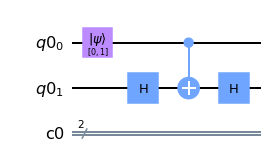

In [51]:
circuit = qiskit.QuantumCircuit(qr, cr)

circuit.initialize([0,1], 0)

circuit.barrier()
circuit.h(1)
circuit.cx(0,1)
circuit.h(1)
circuit.barrier()

hinst = circuit.to_instruction()
circuit.draw(output="mpl", plot_barriers=False)

In [52]:
hinst

In [143]:
def circuit_item():
    circuit = qiskit.QuantumCircuit(qr, cr)

    circuit.initialize([0,1], 0)

    circuit.barrier()
    circuit.h(1)
    circuit.cx(0,1)
    circuit.h(1)
    circuit.barrier()

    return circuit.draw(output="mpl")

In [144]:
c = circuit_item()#.to_instruction() # error, it does not return circuit

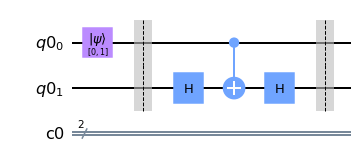

In [145]:
circuit_item()

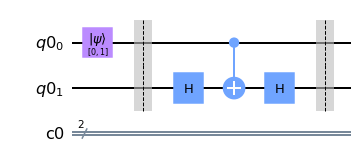

In [132]:
c

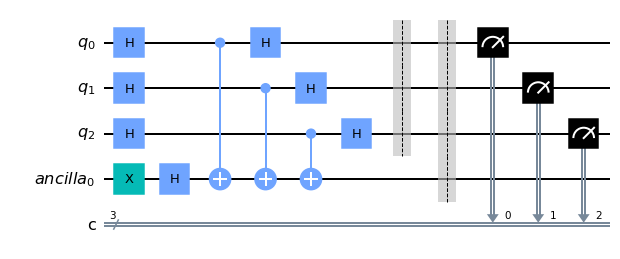

In [147]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(3, 'q')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, anc, cr)
qc.x(anc[0])
qc.h(anc[0])
qc.h(qr[0:3])
qc.cx(qr[0:3], anc[0])
qc.h(qr[0:3])
qc.barrier(qr)
qc.barrier()
qc.measure(qr, cr)
#qc.measure_all()
qc.draw(output="mpl")

In [148]:
print(qc.num_qubits)

4


In [149]:
qc.depth()

7

In [150]:
qc.width()

7

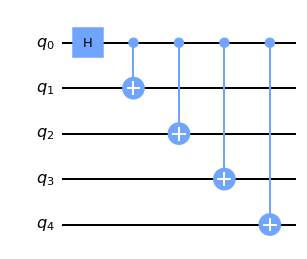

In [80]:
qc1 = QuantumCircuit(5)
qc1.h(0)
#qc1.reset(1)
qc1.cx(0, range(1, 5))
#qc1.measure_all()

qc1.draw(output="mpl")

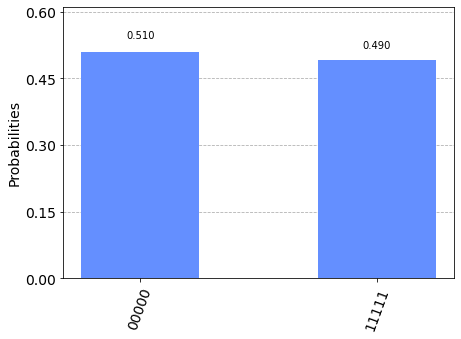

In [66]:
result = execute(qc1, backend=qasm_sim).result()

counts_sim = result.get_counts()

plot_histogram(counts_sim)

In [234]:
qc1.depth()

5

In [83]:
import qiskit.quantum_info as qi
state_matrix = qi.Statevector.from_instruction(qc1)

print(qc1.num_qubits)
state_matrix.draw("latex")
#state_matrix

5


<IPython.core.display.Latex object>

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


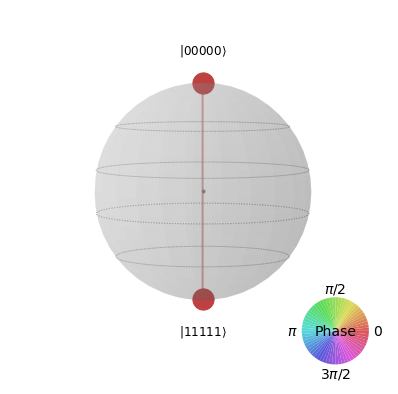

In [255]:
state_matrix = qi.Statevector.from_instruction(qc1)
state_matrix.draw('qsphere')

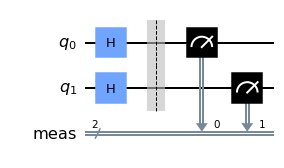

In [85]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.measure_all()
#qc.measure(1,[0,1])
qc.draw(output="mpl")

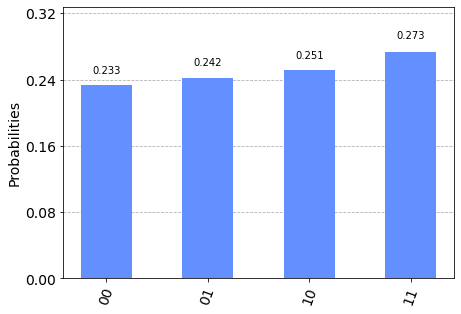

In [86]:
result = execute(qc, backend=qasm_sim).result()

counts_sim = result.get_counts()

plot_histogram(counts_sim)

In [87]:
qc.width()

4

In [88]:
qc.depth()

2

In [76]:
#qc1 += qc
#qc1.draw(output="mpl")
#CircuitError: "circuits are not compatible: registers QuantumRegister(5, 'q') and QuantumRegister(2, 'q') not compatible"

In [235]:
qiskit.BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

In [78]:
qiskit.Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [79]:
# simulators
qasm_sim = qiskit.Aer.get_backend("aer_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

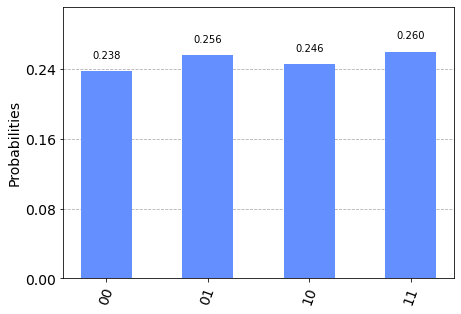

In [80]:
result = execute(qc, backend=qasm_sim).result()

counts_sim = result.get_counts()

plot_histogram(counts_sim)

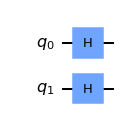

In [244]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
#qc.measure_all()
qc.draw(output="mpl")

In [245]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result_unitary = job.result()

unitary_array = result_unitary.get_unitary(qc, decimals=3)
print(unitary_array)

[[ 0.5+0.j  0.5-0.j  0.5-0.j  0.5-0.j]
 [ 0.5+0.j -0.5+0.j  0.5-0.j -0.5+0.j]
 [ 0.5+0.j  0.5-0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5-0.j]]


In [246]:
from qiskit.visualization import array_to_latex
array_to_latex(unitary_array, prefix="\\text{unitary_array = }\n")

<IPython.core.display.Latex object>

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


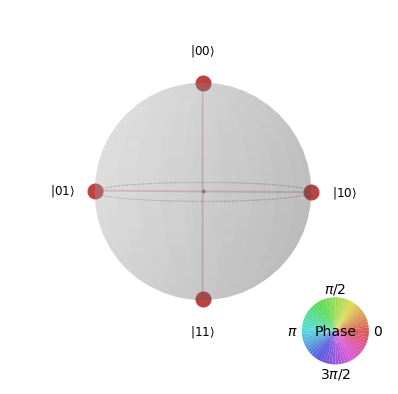

In [247]:
state_matrix = qi.Statevector.from_instruction(qc)
state_matrix.draw('qsphere')

In [84]:
usim = Aer.get_backend('unitary_simulator')

transpiled = transpile(qc, backend=usim, optimization_level=3)

qobj = assemble(transpiled)

unitary = usim.run(qobj).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit operation = }\n")

<IPython.core.display.Latex object>

In [85]:
import qiskit.quantum_info as qi
state_matrix = qi.Statevector.from_instruction(qc)
print(state_matrix)
print(qc.num_qubits)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))
2


In [86]:
from qiskit.visualization import array_to_latex
array_to_latex(state_matrix, prefix="\\text{state_matrix = }\n")

<IPython.core.display.Latex object>

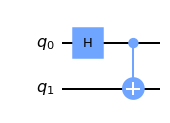

In [51]:
qcc = QuantumCircuit(2)
qcc.h(0)
qcc.cx(0,1)
#qcc.measure_all()
qcc.draw(output="mpl")

In [52]:
import qiskit.quantum_info as qi
state_matrix = qi.Statevector.from_instruction(qcc)
print(state_matrix)
print(qcc.num_qubits)
print(state_matrix.data)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
2
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


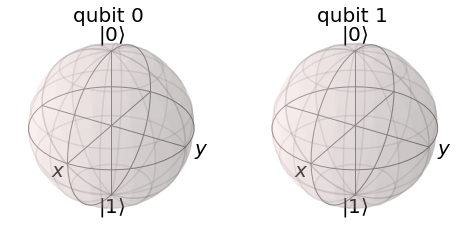

In [53]:
plot_bloch_multivector(state_matrix)

In [242]:
from qiskit.visualization import array_to_latex
array_to_latex(state_matrix, prefix="\\text{state_matrix = }\n")

<IPython.core.display.Latex object>

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


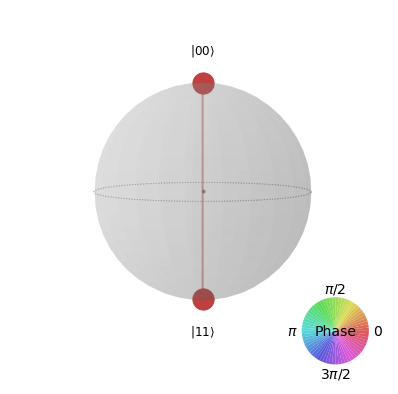

In [243]:
state_matrix.draw('qsphere')

In [90]:
usim = Aer.get_backend('unitary_simulator')

transpiled = transpile(qcc, backend=usim, optimization_level=3)

qobj = assemble(transpiled)

unitary = usim.run(qobj).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit operation = }\n")

<IPython.core.display.Latex object>

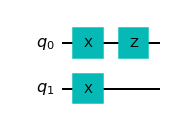

In [248]:
qcc = QuantumCircuit(2)
qcc.x(0)
qcc.z(0)
qcc.x(1)
#qcc.measure_all()
qcc.draw(output="mpl")

In [249]:
import qiskit.quantum_info as qi
state_matrix = qi.Statevector.from_instruction(qcc)
print(state_matrix)
print(qcc.num_qubits)
print(state_matrix.data)

Statevector([ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
            dims=(2, 2))
2
[ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]


/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


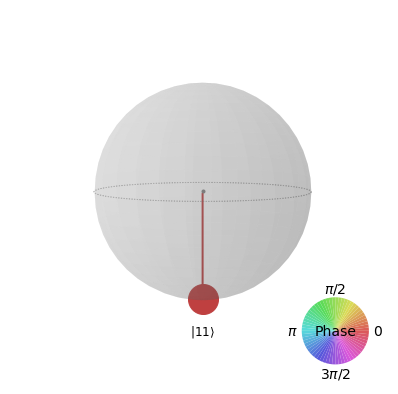

In [250]:
state_matrix = qi.Statevector.from_instruction(qcc)
state_matrix.draw('qsphere')

In [93]:
usim = Aer.get_backend('unitary_simulator')

transpiled = transpile(qcc, backend=usim, optimization_level=3)

qobj = assemble(transpiled)

unitary = usim.run(qobj).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit operation = }\n")

<IPython.core.display.Latex object>

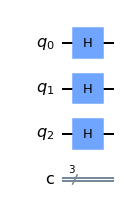

In [33]:
qcc2 = QuantumCircuit(3,3)
qcc2.h(0)
qcc2.h(1)
qcc2.h(2)
#qcc2.measure(0,0)
#qcc2.measure([0],[0])
#qcc2.measure_all()
qcc2.draw(output="mpl")

In [252]:
print(qcc2.num_qubits)

3


/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


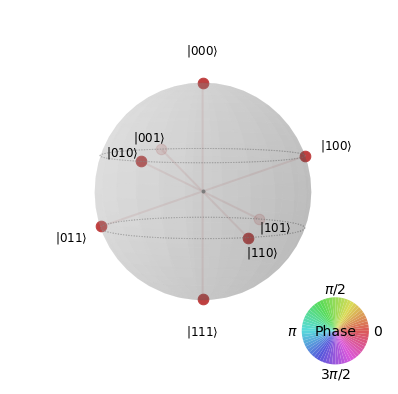

In [253]:
state_matrix = qi.Statevector.from_instruction(qcc2)
state_matrix.draw('qsphere')

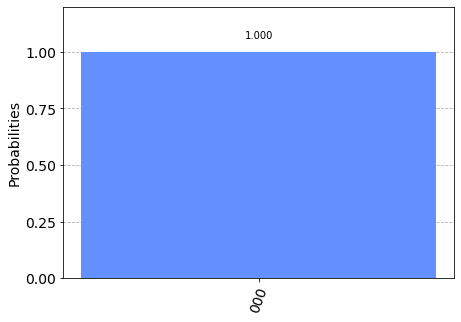

In [73]:
result = execute(qcc2, backend=qasm_sim).result()

counts_sim = result.get_counts()

plot_histogram(counts_sim)

In [74]:
usim = Aer.get_backend('unitary_simulator')

transpiled = transpile(qcc2, backend=usim, optimization_level=3)

qobj = assemble(transpiled)

unitary = usim.run(qobj).result().get_unitary()

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit operation = }\n")

<IPython.core.display.Latex object>

In [75]:
print(unitary)

[[ 0.35355339+0.00000000e+00j  0.35355339-4.32978028e-17j
   0.35355339-4.32978028e-17j  0.35355339-8.65956056e-17j
   0.35355339-4.32978028e-17j  0.35355339-8.65956056e-17j
   0.35355339-8.65956056e-17j  0.35355339-1.29893408e-16j]
 [ 0.35355339+0.00000000e+00j -0.35355339+4.32978028e-17j
   0.35355339-4.32978028e-17j -0.35355339+8.65956056e-17j
   0.35355339-4.32978028e-17j -0.35355339+8.65956056e-17j
   0.35355339-8.65956056e-17j -0.35355339+1.29893408e-16j]
 [ 0.35355339+0.00000000e+00j  0.35355339-4.32978028e-17j
  -0.35355339+4.32978028e-17j -0.35355339+8.65956056e-17j
   0.35355339-4.32978028e-17j  0.35355339-8.65956056e-17j
  -0.35355339+8.65956056e-17j -0.35355339+1.29893408e-16j]
 [ 0.35355339+0.00000000e+00j -0.35355339+4.32978028e-17j
  -0.35355339+4.32978028e-17j  0.35355339-8.65956056e-17j
   0.35355339-4.32978028e-17j -0.35355339+8.65956056e-17j
  -0.35355339+8.65956056e-17j  0.35355339-1.29893408e-16j]
 [ 0.35355339+0.00000000e+00j  0.35355339-4.32978028e-17j
   0.35355

# Note:
# Initialize assumes the state is currently in the ground state. Because of this, the new circuit that is made will include a reset on each qubit at the beginning of the circuit.

In [54]:
import qiskit.quantum_info as qi
state_matrix = qi.Statevector.from_instruction(qcc2)

In [55]:
state_matrix.draw("latex")

<IPython.core.display.Latex object>

In [202]:
from qiskit.visualization import array_to_latex
array_to_latex(state_matrix, prefix="\\text{state_matrix = }\n")

<IPython.core.display.Latex object>

In [204]:
sim_state_vector = qiskit.execute(qcc2, backend=statevec_sim).result().get_statevector()

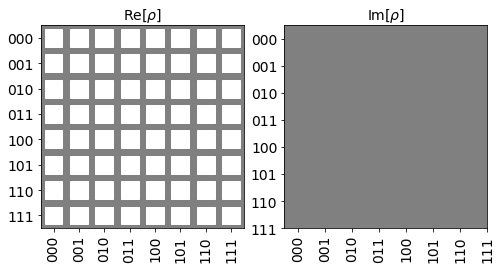

In [205]:
plot_state_hinton(sim_state_vector)

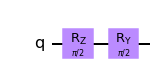

In [49]:
import math

test = QuantumCircuit(1)
test.rz(math.pi/2,0)
test.ry(math.pi/2,0)
#test.rz(math.pi/2,0)
#test.h(0)
#test.measure_all()
test.draw(output="mpl")

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


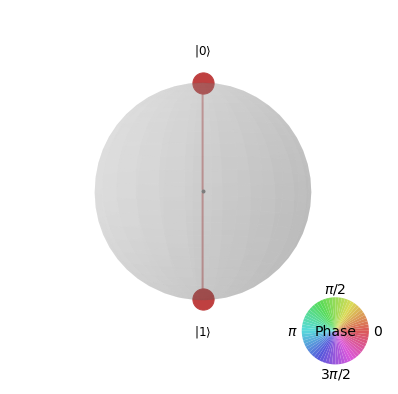

In [50]:
state_matrix = qi.Statevector.from_instruction(test)
state_matrix.draw('qsphere')

In [39]:
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")
sim_state_vector3 = qiskit.execute(test, backend=statevec_sim).result().get_statevector()

In [40]:
sim_state_vector3

array([0.5-0.5j, 0.5-0.5j])

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


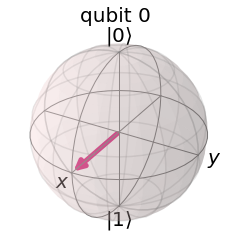

In [108]:
plot_bloch_multivector(sim_state_vector3)

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:402: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


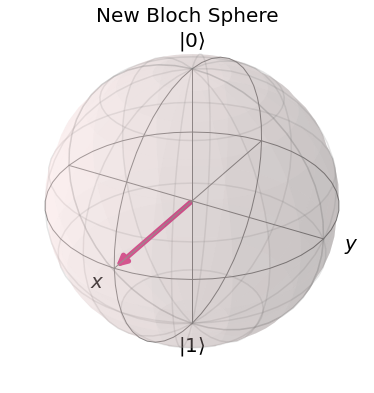

In [109]:
plot_bloch_vector([1,0,0], title="New Bloch Sphere")

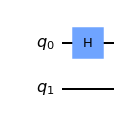

In [41]:
qc = QuantumCircuit(2)
qc.h(0)
#qc.measure_all()
qc.draw(output="mpl")

In [111]:
import qiskit.quantum_info as qi
state_matrix = qi.Statevector.from_instruction(qc)

In [112]:
state_matrix.draw("latex")

<IPython.core.display.Latex object>

In [113]:
state_matrix

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))


In [114]:
state_matrix.data

array([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j])

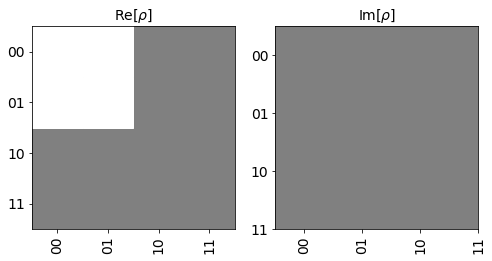

In [115]:
state_matrix.draw('hinton')

In [116]:
state_matrix.draw('latex')

<IPython.core.display.Latex object>

In [117]:
state_matrix.draw('latex_source')

'\n\n\\begin{bmatrix}\n\\tfrac{1}{\\sqrt{2}} & \\tfrac{1}{\\sqrt{2}} & 0 & 0  \\\\\n \\end{bmatrix}\n'

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


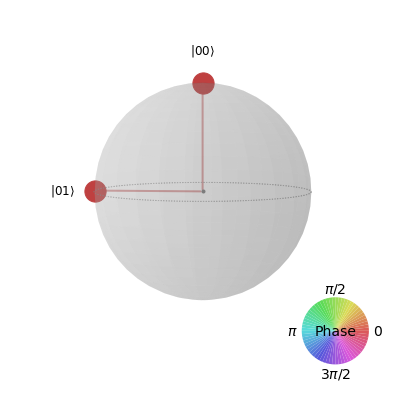

In [118]:
state_matrix.draw('qsphere')

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


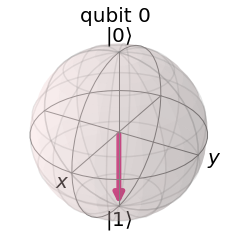

In [165]:
xx = qi.Statevector.from_int(1,2)
xx.draw("bloch")

1
2
3
4


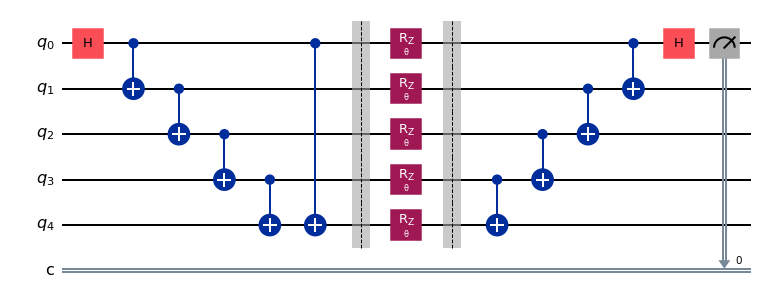

In [58]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    print(i+1)
    qc.cx(i, i+1)
qc.cx(0, -1)
qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl', interactive=True, style="iqx")

In [59]:
qc.depth()

13

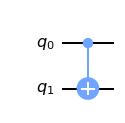

In [133]:
qc = QuantumCircuit(2)
qc.cx(0, -1)
qc.draw(output='mpl', reverse_bits=False, plot_barriers=True)

In [135]:
import qiskit.quantum_info as qi
state_matrix = qi.Statevector.from_instruction(qc)

In [137]:
state_matrix.draw('latex')

<IPython.core.display.Latex object>

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/state_visualization.py:705: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


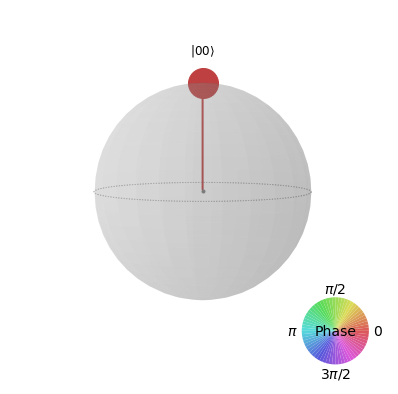

In [136]:
state_matrix.draw('qsphere')

In [34]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3))

In [124]:
circuit.depth()

4

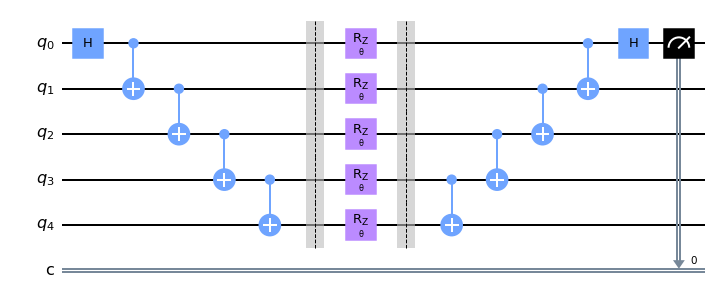

In [125]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Gate
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)
#qc.cx(3,4)
qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw("mpl")

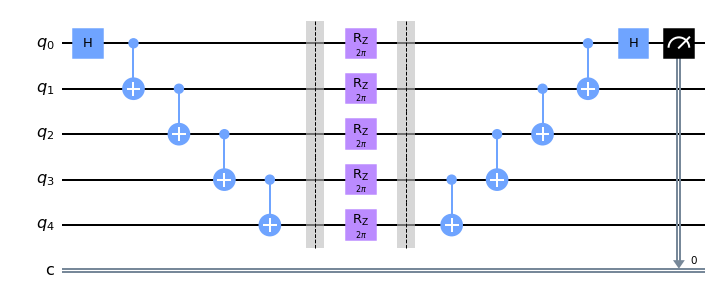

ParameterView([])

In [126]:
import numpy as np

theta_range = np.linspace(0, 2 * np.pi, 128)
circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

display(circuits[-1].draw("mpl"))
display(circuits[-1].parameters)

In [127]:
circuits[-1].depth()

12

In [128]:
print(circuits[-1].draw())
print(circuits[-1].parameters)

     ┌───┐                     ░ ┌────────┐ ░                     ┌───┐┌─┐
q_0: ┤ H ├──■──────────────────░─┤ RZ(2π) ├─░──────────────────■──┤ H ├┤M├
     └───┘┌─┴─┐                ░ ├────────┤ ░                ┌─┴─┐└───┘└╥┘
q_1: ─────┤ X ├──■─────────────░─┤ RZ(2π) ├─░─────────────■──┤ X ├──────╫─
          └───┘┌─┴─┐           ░ ├────────┤ ░           ┌─┴─┐└───┘      ║ 
q_2: ──────────┤ X ├──■────────░─┤ RZ(2π) ├─░────────■──┤ X ├───────────╫─
               └───┘┌─┴─┐      ░ ├────────┤ ░      ┌─┴─┐└───┘           ║ 
q_3: ───────────────┤ X ├──■───░─┤ RZ(2π) ├─░───■──┤ X ├────────────────╫─
                    └───┘┌─┴─┐ ░ ├────────┤ ░ ┌─┴─┐└───┘                ║ 
q_4: ────────────────────┤ X ├─░─┤ RZ(2π) ├─░─┤ X ├─────────────────────╫─
                         └───┘ ░ └────────┘ ░ └───┘                     ║ 
c: 1/═══════════════════════════════════════════════════════════════════╩═
                                                                        0 
ParameterView([])


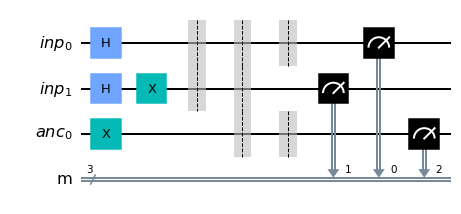

In [129]:
inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
clas = ClassicalRegister(3, name='m')
qc = QuantumCircuit(inp_reg, ancilla, clas)
#qc.h(inp_reg[0:2])
#qc.x(ancilla[0])
qc.h(inp_reg[0])
qc.h(inp_reg[1])
qc.x(inp_reg[1])
qc.x(ancilla[0])
qc.barrier(inp_reg) # ok
qc.barrier()
qc.barrier([0,-1])
#qc.measure_all() # inserts barrier automagicaly
qc.measure([0,1,2], [0,1,2])
#qc.measure(inp_reg, clas[0:2])
#qc.measure([2],[1]) # ok
qc.draw(output="mpl")

In [130]:
qc.num_qubits

3

In [131]:
qc.depth()

3

In [132]:
qc.width() # qbits + cbits

6

# if measuring n-qbits targeting same creg then +n in depth

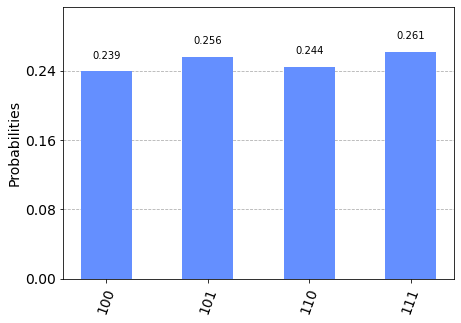

In [133]:
result = execute(qc, backend=qasm_sim).result()

counts_sim = result.get_counts()

plot_histogram(counts_sim)

# Clifford gates: Hadamard, CNOT and S (also X and Sdg)

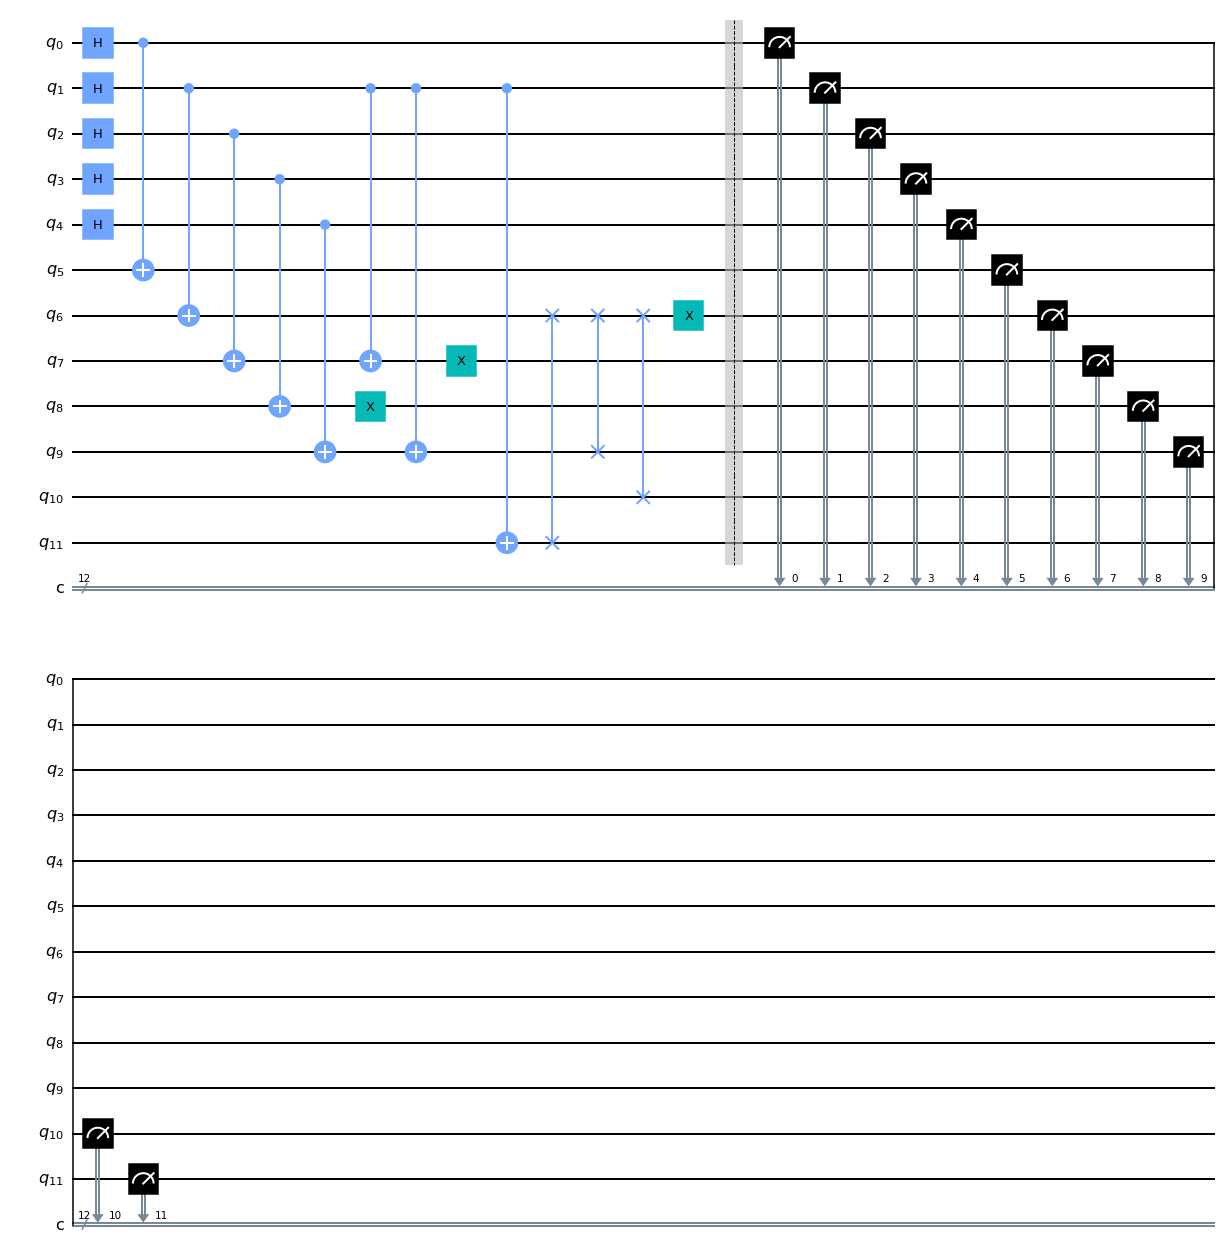

In [212]:
qc2 = QuantumCircuit(12, 12)

for idx in range(5):
    qc2.h(idx)
    qc2.cx(idx, idx+5)

qc2.cx(1, 7)
qc2.x(8)
qc2.cx(1, 9)
qc2.x(7)
qc2.cx(1, 11)
qc2.swap(6, 11)
qc2.swap(6, 9)
qc2.swap(6, 10)
qc2.x(6)
qc2.barrier()
qc2.measure(range(12), range(12))
qc2.draw(output="mpl")

In [213]:
qc2.depth()

10

In [136]:
qc2.width()

24

In [137]:
qc2.count_ops()

OrderedDict([('measure', 12),
             ('cx', 8),
             ('h', 5),
             ('x', 3),
             ('swap', 3),
             ('barrier', 1)])

In [138]:
from qiskit import *
import qiskit.tools.jupyter  # This is the where the magic happens (literally).

In [ ]:
IBMQ.load_account();
provider = IBMQ.get_provider(group='open')

ibmqfactory.load_account:WARNING:2021-06-18 08:26:59,282: Credentials are already in use. The existing account in the session will be replaced.


In [169]:
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [219]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [141]:
backend = provider.get_backend('ibmq_quito')

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])

job = execute(qc, backend)

In [220]:
%qiskit_disable_job_watcher

In [143]:
config = backend.configuration()
params = backend.properties()

In [144]:
backend

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

In [215]:
%qiskit_backend_overview

https://qiskit.org/documentation/apidoc/aer_provider.html

In [146]:
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator

In [221]:
qasm_sim = QasmSimulator()

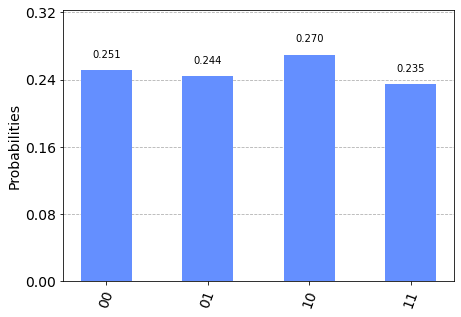

In [222]:
result = execute(qc, backend=qasm_sim).result()

counts_sim = result.get_counts()

plot_histogram(counts_sim)

In [224]:
statevec_sim = StatevectorSimulator()

/home/qiskit/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


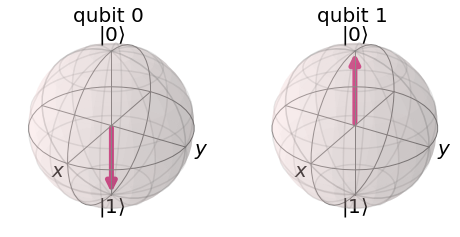

In [227]:
sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(sim_state_vector)